# Camera Calibration

In [15]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def calibrate_camera():
    
    files = glob.glob('camera_cal/calibration*.jpg')
    checkerboardsize = (9,6)
    
    h_count,v_count = checkerboardsize
    
    objp = np.zeros((v_count*h_count,3), np.float32)
    objp[:,:2] = np.mgrid[0:h_count, 0:v_count].T.reshape(-1,2)
    
    objpoints = []
    imgpoints = []
    
    for idx, fname in enumerate(files):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (h_count,v_count), None)

        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    
    image = cv2.imread(files[0])
    image_size = (image.shape[1], image.shape[0])
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size,None,None)

    return mtx, dist

cameraMatrix, distortionCoefficients = calibrate_camera()

def undistort(file):

    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
    dst = cv2.undistort(
        image, 
        cameraMatrix, 
        distortionCoefficients, 
        None, 
        cameraMatrix)
    
    return dst


def test_undistort(file):
    
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    dst = undistort(file)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
    

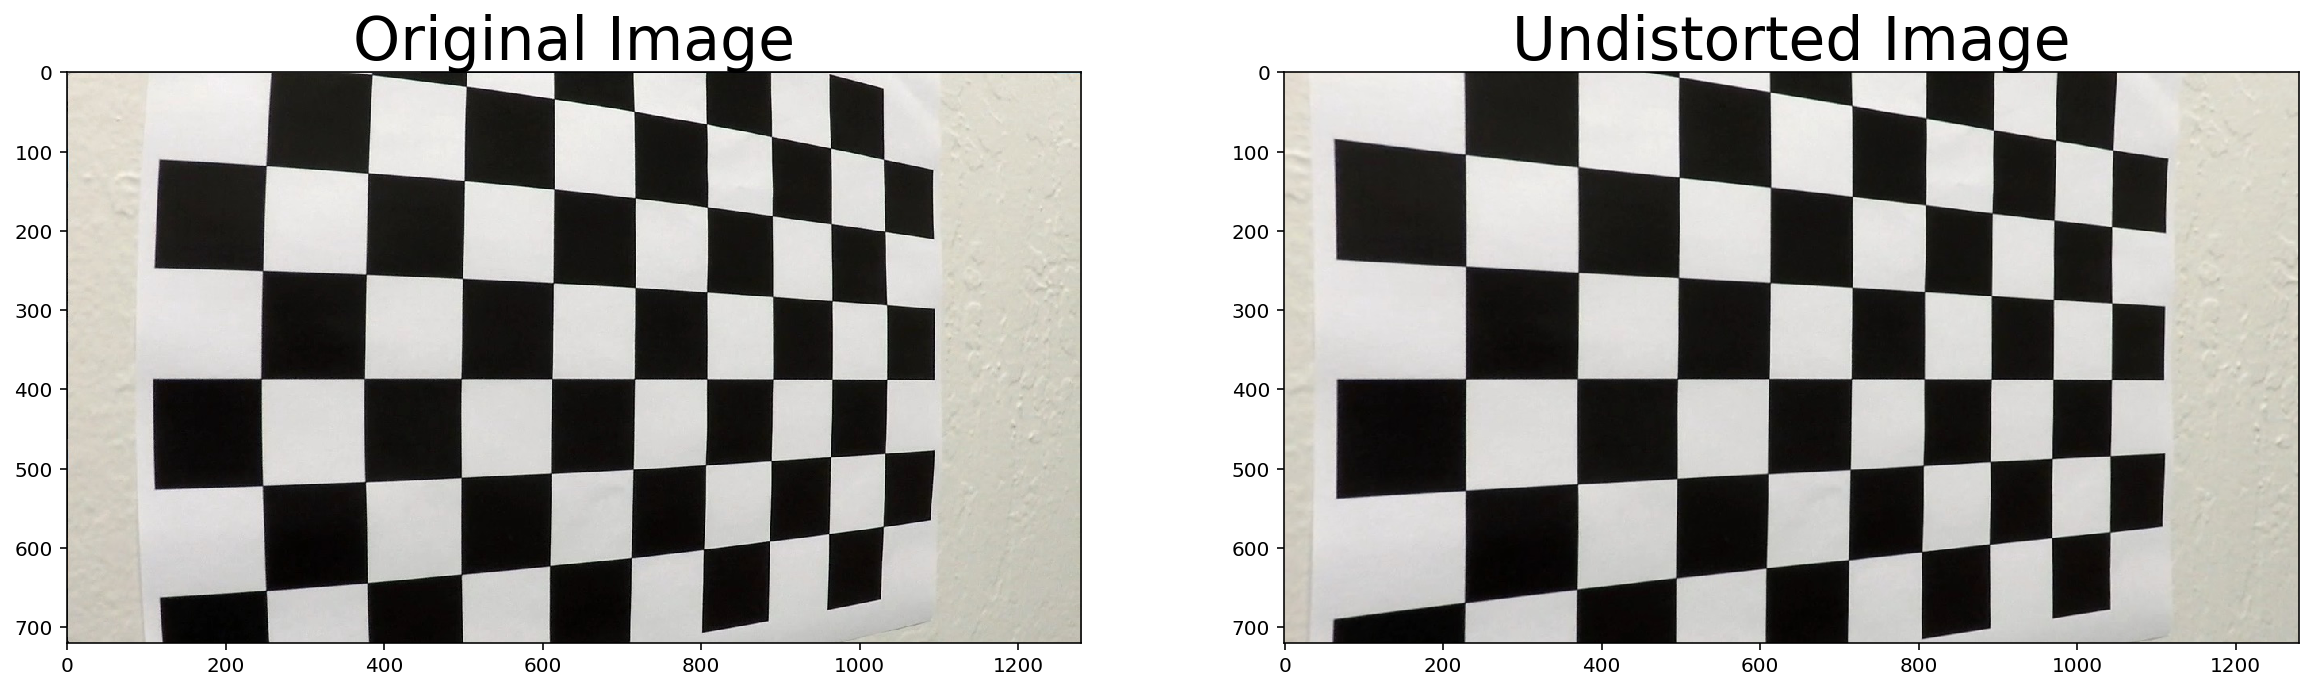

In [22]:
test_undistort('camera_cal/calibration5.jpg')

# Distortion Correction

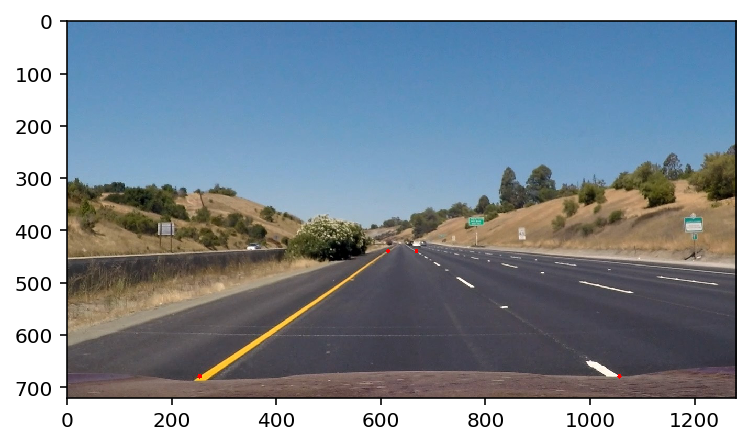

In [43]:
img = cv2.imread('test_images/straight_lines1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 


undistorted = undistort('test_images/straight_lines1.jpg')
plt.imshow(img)

src = np.float32([
    [613,439], #top_left
    [667,439], #top_right
    [1055,678], #bottom_right
    [253,678] #bottom_left
    ])


dst = np.float32([
    [253,0], #top_left
    [1055,0], #top_right
    [1055,720], #bottom_right
    [253,720] #bottom_left
    ])

M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(undistorted, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
plt.imshow(warped)


for corner in src:
    cv2.circle(img, (corner[0],corner[1]),1, (255, 0, 0), 5)
    

#pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
#pts = pts.reshape((-1,1,2))
#cv2.polylines(img,[pts],True,(0,255,255))    

plt.imshow(img)

                             
                             
                        




